In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [20]:
carprice=pd.read_csv('CarPrice_Assignment.csv')

In [21]:
carprice.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0  1       3          alfa-romero giulia        gas      std        two         
1  2       3          alfa-romero stelvio       gas      std        two         
2  3       1          alfa-romero Quadrifoglio  gas      std        two         
3  4       2          audi 100 ls               gas      std        four        
4  5       2          audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible  rwd        front          88.6       ...  130          
1  convertible  rwd        front          88.6       ...  130          
2  hatchback    rwd        front          94.5       ...  152          
3  sedan        fwd        front          99.8       ...  109          
4  sedan        4wd        front          99.4       ...  136          

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0  mpfi        3.47       2.68    9.0              111        5000     21       
1  mpfi        3.47       2.68    9.0              111        5000     21       
2  mpfi        2.68       3.47    9.0              154        5000     19       
3  mpfi        3.19       3.40    10.0             102        5500     24       
4  mpfi        3.19       3.40    8.0              115        5500     18       

   highwaympg    price  
0  27          13495.0  
1  27          16500.0  
2  26          16500.0  
3  30          13950.0  
4  22          17450.0  

[5 rows x 26 columns]

In [22]:
carprice.shape

(205, 26)

In [23]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [24]:
carDictionary=pd.read_excel('Data Dictionary - carprices.xlsx')

In [25]:
pd.set_option('display.max_colwidth', -1)
carDictionary

Variable  \
0   Car_ID                      
1   Symboling                   
2   carCompany                  
3   fueltype                    
4   aspiration                  
5   doornumber                  
6   carbody                     
7   drivewheel                  
8   enginelocation              
9   wheelbase                   
10  carlength                   
11  carwidth                    
12  carheight                   
13  curbweight                  
14  enginetype                  
15  cylindernumber              
16  enginesize                  
17  fuelsystem                  
18  boreratio                   
19  stroke                      
20  compressionratio            
21  horsepower                  
22  peakrpm                     
23  citympg                     
24  highwaympg                  
25  price(Dependent variable)   

                                                                                                                                     Desc  
0   Unique id of each observation (Interger)                                                                                               
1   Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)   
2   Name of car company (Categorical)                                                                                                      
3   Car fuel type i.e gas or diesel (Categorical)                                                                                          
4   Aspiration used in a car (Categorical)                                                                                                 
5   Number of doors in a car (Categorical)                                                                                                 
6   body of car (Categorical)                                                                                                              
7   type of drive wheel (Categorical)                                                                                                      
8   Location of car engine (Categorical)                                                                                                   
9   Weelbase of car (Numeric)                                                                                                              
10  Length of car (Numeric)                                                                                                                
11  Width of car (Numeric)                                                                                                                 
12  height of car (Numeric)                                                                                                                
13  The weight of a car without occupants or baggage. (Numeric)                                                                            
14  Type of engine. (Categorical)                                                                                                          
15  cylinder placed in the car (Categorical)                                                                                               
16  Size of car (Numeric)                                                                                                                  
17  Fuel system of car (Categorical)                                                                                                       
18  Boreratio of car (Numeric)                                                                                                             
19  Stroke or volume inside the engine (Numeric)                                                                                           
20  compression ratio of car (Numeric)                                                                                                     
21  Horsepower (Numeric)                         

In [26]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [27]:
carprice['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [28]:
#Creating a new variable company from CarName and doing some spelling corrections
carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ')[0])
carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})


In [29]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


In [30]:
#Convering Cylindernumber to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

# UNIVARIATE ANALYSIS

In [31]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

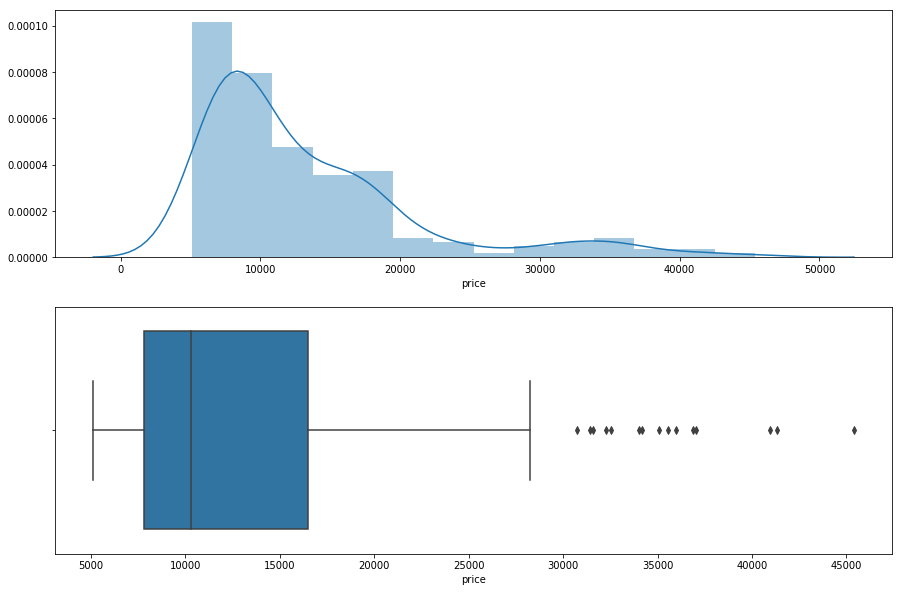

In [32]:
#Plotting the price of the our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price ranges around 5k-45k with Median around 10k

In [33]:
def display_count(ax):
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6),)

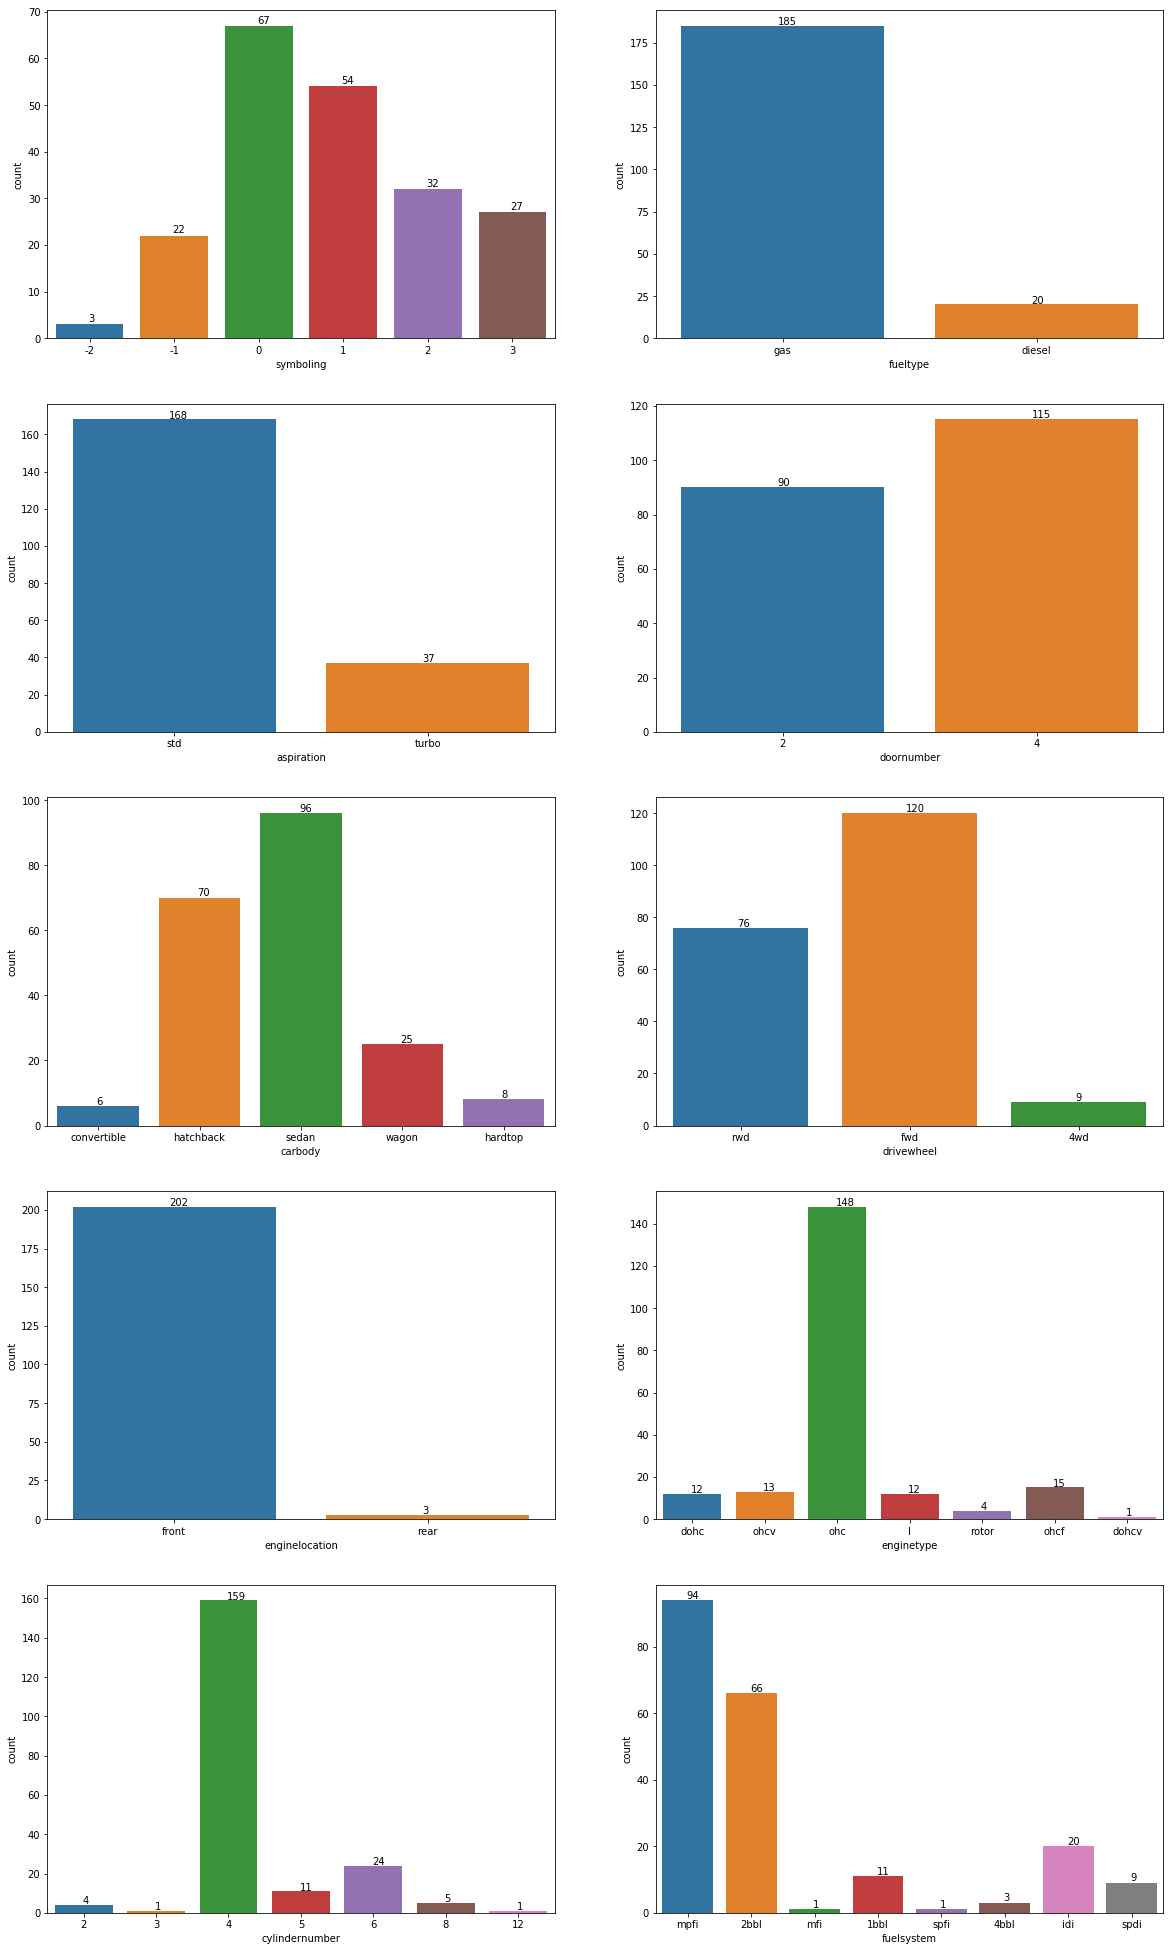

In [34]:
plt.figure(figsize=(20,35))

plt.subplot(5,2,1)
ax=sns.countplot(carprice['symboling'])
display_count(ax)
plt.subplot(5,2,2)
ax=sns.countplot(carprice['fueltype'])
display_count(ax)
plt.subplot(5,2,3)
ax=sns.countplot(carprice['aspiration'])
display_count(ax)
plt.subplot(5,2,4)
ax=sns.countplot(carprice['doornumber'])
display_count(ax)
plt.subplot(5,2,5)
ax=sns.countplot(carprice['carbody'])
display_count(ax)
plt.subplot(5,2,6)
ax=sns.countplot(carprice['drivewheel'])
display_count(ax)
plt.subplot(5,2,7)
ax=sns.countplot(carprice['enginelocation'])
display_count(ax)
plt.subplot(5,2,8)
ax=sns.countplot(carprice['enginetype'])
display_count(ax)
plt.subplot(5,2,9)
ax=sns.countplot(carprice['cylindernumber'])
display_count(ax)
plt.subplot(5,2,10)
ax=sns.countplot(carprice['fuelsystem'])
display_count(ax)

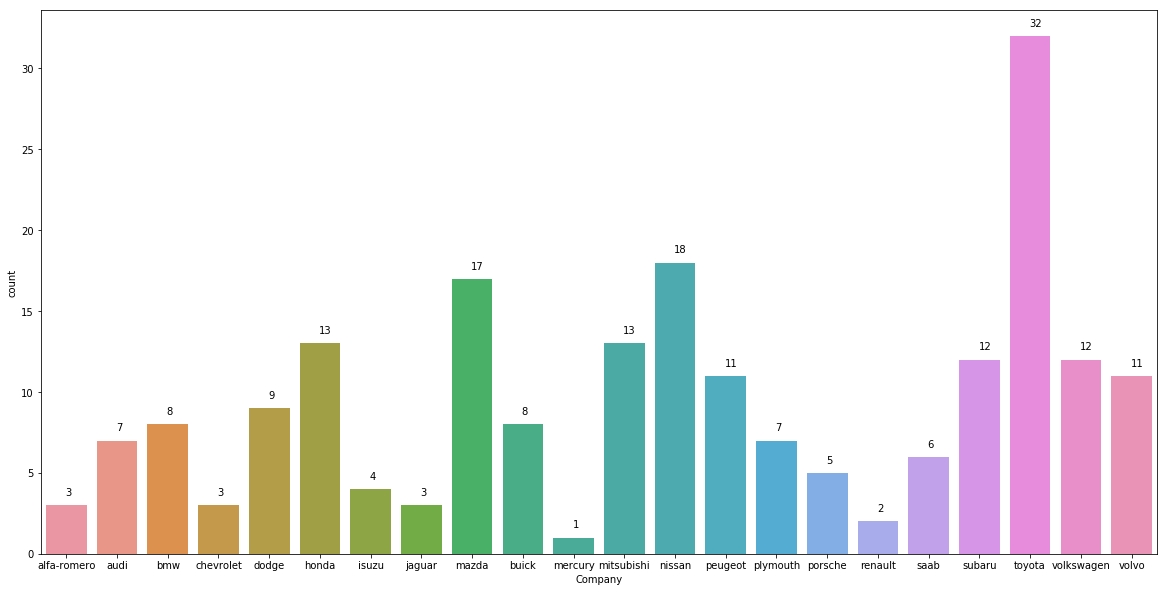

In [35]:
plt.figure(figsize=(20,10))
ax=sns.countplot(carprice['Company'])
display_count(ax)

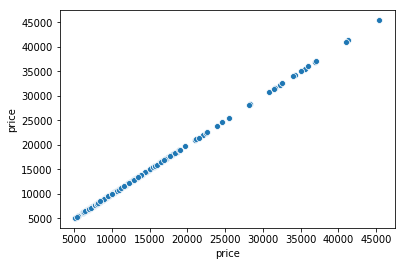

In [95]:
sns.scatterplot(carprice['price'])

In [36]:
carprice.nunique()

symboling           6  
fueltype            2  
aspiration          2  
doornumber          2  
carbody             5  
drivewheel          3  
enginelocation      2  
wheelbase           53 
carlength           75 
carwidth            44 
carheight           49 
curbweight          171
enginetype          7  
cylindernumber      7  
enginesize          44 
fuelsystem          8  
boreratio           38 
stroke              37 
compressionratio    32 
horsepower          59 
peakrpm             23 
citympg             29 
highwaympg          30 
price               189
Company             22 
dtype: int64

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

In [37]:
# plt.figure(figsize=(20,35))

# plt.subplot(5,2,1)
# sns.boxplot(carprice['symboling'],carprice['price'])

# plt.subplot(5,2,2)
# sns.boxplot(carprice['fueltype'],carprice['price'])

# plt.subplot(5,2,3)
# sns.boxplot(carprice['aspiration'],carprice['price'])

# plt.subplot(5,2,4)
# sns.boxplot(carprice['doornumber'],carprice['price'])

# plt.subplot(5,2,5)
# sns.boxplot(carprice['carbody'],carprice['price'])

# plt.subplot(5,2,6)
# sns.boxplot(carprice['drivewheel'],carprice['price'])

# plt.subplot(5,2,7)
# sns.boxplot(carprice['enginelocation'],carprice['price'])

# plt.subplot(5,2,8)
# sns.boxplot(carprice['enginetype'],carprice['price'])

# plt.subplot(5,2,9)
# sns.boxplot(carprice['cylindernumber'],carprice['price'])

# plt.subplot(5,2,10)
# sns.boxplot(carprice['fuelsystem'],carprice['price'])

In [38]:
# plt.figure(figsize=(20,10))
# sns.boxplot(carprice['Company'],carprice['price'])

In [39]:
#Using describe to look at the summary of the Numerical variables
carprice.describe()



symboling  doornumber   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   0.834146    3.121951    98.756585   174.049268  65.907805   53.724878    
std    1.245307    0.994966    6.021776    12.337289   2.145204    2.443522     
min   -2.000000    2.000000    86.600000   141.100000  60.300000   47.800000    
25%    0.000000    2.000000    94.500000   166.300000  64.100000   52.000000    
50%    1.000000    4.000000    97.000000   173.200000  65.500000   54.100000    
75%    2.000000    4.000000    102.400000  183.100000  66.900000   55.500000    
max    3.000000    4.000000    120.900000  208.100000  72.300000   59.800000    

        curbweight  cylindernumber  enginesize   boreratio      stroke  \
count  205.000000   205.000000      205.000000  205.000000  205.000000   
mean   2555.565854  4.380488        126.907317  3.329756    3.255415     
std    520.680204   1.080854        41.642693   0.270844    0.313597     
min    1488.000000  2.000000        61.000000   2.540000    2.070000     
25%    2145.000000  4.000000        97.000000   3.150000    3.110000     
50%    2414.000000  4.000000        120.000000  3.310000    3.290000     
75%    2935.000000  4.000000        141.000000  3.580000    3.410000     
max    4066.000000  12.000000       326.000000  3.940000    4.170000     

       compressionratio  horsepower      peakrpm     citympg  highwaympg  \
count  205.000000        205.000000  205.000000   205.000000  205.000000   
mean   10.142537         104.117073  5125.121951  25.219512   30.751220    
std    3.972040          39.544167   476.985643   6.542142    6.886443     
min    7.000000          48.000000   4150.000000  13.000000   16.000000    
25%    8.600000          70.000000   4800.000000  19.000000   25.000000    
50%    9.000000          95.000000   5200.000000  24.000000   30.000000    
75%    9.400000          116.000000  5500.000000  30.000000   34.000000    
max    23.000000         288.000000  6600.000000  49.000000   54.000000    

              price  
count  205.000000    
mean   13276.710571  
std    7988.852332   
min    5118.000000   
25%    7788.000000   
50%    10295.000000  
75%    16503.000000  
max    45400.000000

In [96]:
#Plotting a pairplot to see the relation between variables
sns.pairplot(carprice)

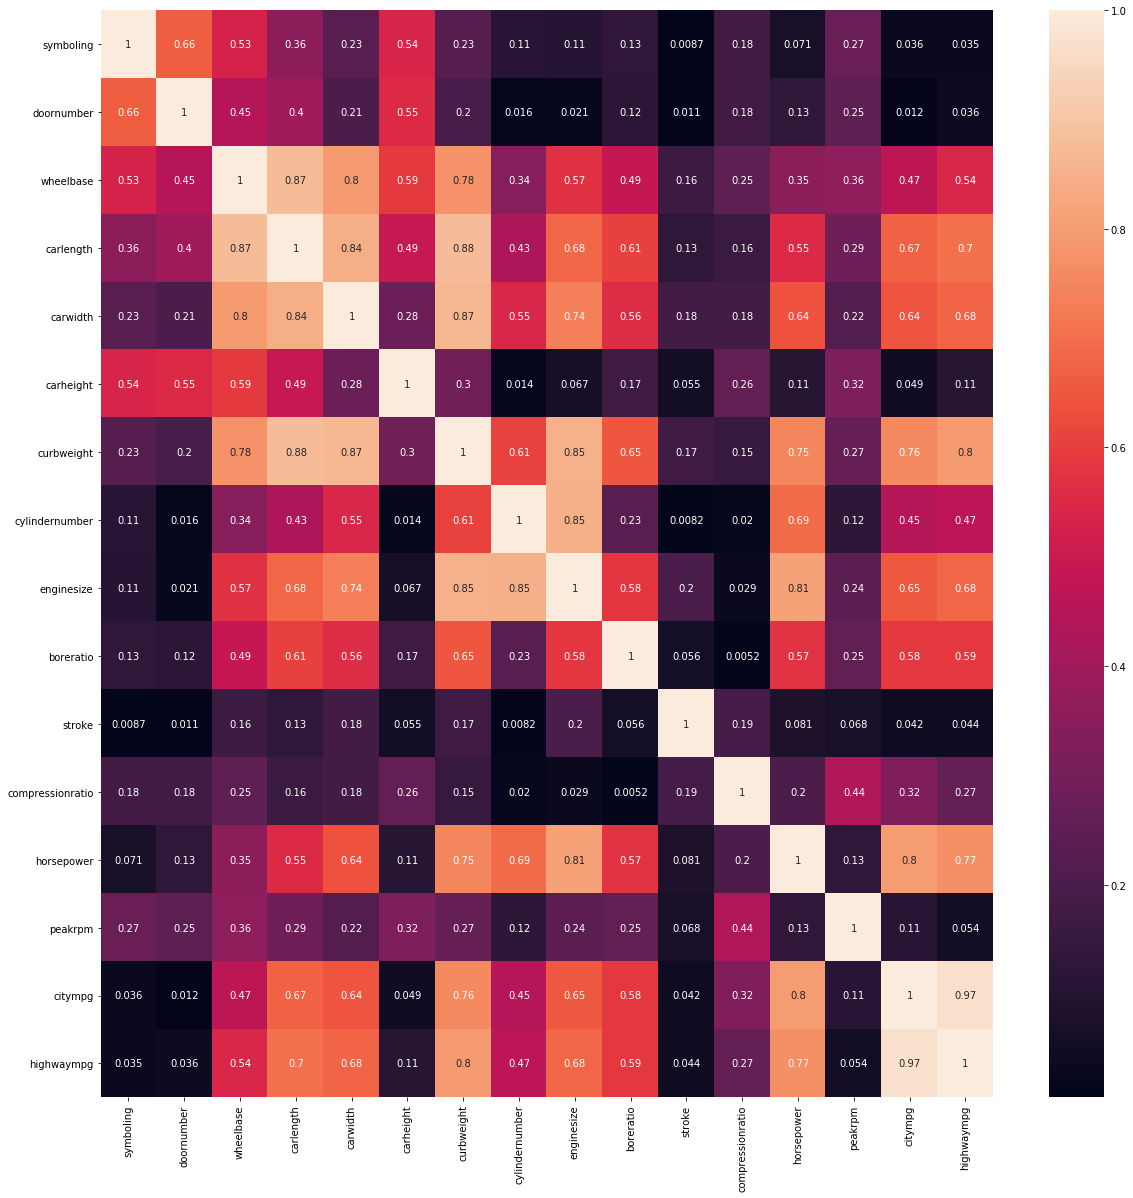

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True)
#Min Max Scaling of numerical columns in X_train


In [266]:
# #Dropping variable with corelation more than 0.8
# correlation_matrix = carprice.drop('price', axis=1).corr()
# i=0
# while i<len(correlation_matrix.columns):
#     for j in range(i):
#         correlation_matrix = carprice.drop('price', axis=1).corr()
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             print("Dropped Column: "+colname+" as its corelation with "+ correlation_matrix.columns[j]+" was {:.3f}".format(correlation_matrix.iloc[i, j]))
#             carprice.drop(colname,axis=1,inplace=True)
#     i=i+1

# # 

Dropped Column: carlength as its corelation with wheelbase was 0.875
Dropped Column: curbweight as its corelation with carwidth was 0.867
Dropped Column: enginesize as its corelation with cylindernumber was 0.846
Dropped Column: citympg as its corelation with horsepower was -0.801


In [42]:
# Symboling- Min Max Encoding
# Fueltype - Map gas with 1 and diesel with 0
# Aspiratino - Map Std as 1 and turbo as 0
# Door Number - Label Encoding
# Carbody - pd.dummies
# Drivewheel= pd.dummies(columns-rwd and fwd)
# Enginelocatin - Drop
# Enginetype- pd.dummies(drop dohcv)
# Cylinder number - Label Encoding
# Fuel System - pd.dummies(drop mfi)#     i=i+1

#Creating dummy variables for categories with 2 unique values
varlist=['fueltype','aspiration','carbody','drivewheel',
        'fuelsystem','enginetype','Company','doornumber']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_')


In [43]:
carprice.drop(columns=['fueltype_diesel','aspiration_turbo','carbody_convertible','drivewheel_4wd','enginelocation'
                         ,'enginetype_dohcv','fuelsystem_mfi','doornumber_2'],axis=1,inplace=True)

In [44]:
carprice.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0  3          88.6       168.8      64.1      48.8       2548         
1  3          88.6       168.8      64.1      48.8       2548         
2  1          94.5       171.2      65.5      52.4       2823         
3  2          99.8       176.6      66.2      54.3       2337         
4  2          99.4       176.6      66.4      54.3       2824         

   cylindernumber  enginesize  boreratio  stroke  ...  Company_peugeot  \
0  4               130         3.47       2.68    ...  0                 
1  4               130         3.47       2.68    ...  0                 
2  6               152         2.68       3.47    ...  0                 
3  4               109         3.19       3.40    ...  0                 
4  5               136         3.19       3.40    ...  0                 

   Company_plymouth  Company_porsche  Company_renault  Company_saab  \
0  0                 0                0                0              
1  0                 0                0                0              
2  0                 0                0                0              
3  0                 0                0                0              
4  0                 0                0                0              

   Company_subaru  Company_toyota  Company_volkswagen  Company_volvo  \
0  0               0               0                   0               
1  0               0               0                   0               
2  0               0               0                   0               
3  0               0               0                   0               
4  0               0               0                   0               

   doornumber_4  
0  0             
1  0             
2  0             
3  1             
4  1             

[5 rows x 60 columns]

In [45]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [46]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 60)
(62, 60)


In [47]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

mm_scaler_list=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm',
         'highwaympg','citympg','symboling','cylindernumber','price']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


In [48]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [50]:
# #Min Max Scaling of numerical columns in X_train

# from sklearn.preprocessing import LabelEncoder
# le_scaler=LabelEncoder()

# le_scaler_list=['symboling','doornumber','cylindernumber']

# X_train[le_scaler_list]=X_train[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))


In [51]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
#Feature selection using RFE

from sklearn.feature_selection import RFE
rfe=RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [53]:
# rfe.support_

In [54]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [55]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

carwidth  curbweight  cylindernumber  enginesize  boreratio    stroke  \
122  0.291667  0.272692    0.2             0.139623    0.230159   0.525253   
125  0.666667  0.500388    0.2             0.339623    1.000000   0.464646   
166  0.308333  0.314973    0.2             0.139623    0.444444   0.449495   
1    0.316667  0.411171    0.2             0.260377    0.626984   0.247475   
199  0.575000  0.647401    0.2             0.260377    0.746032   0.484848   

     compressionratio  fueltype_gas  fuelsystem_idi  enginetype_dohc  \
122  0.15000           1             0               0                 
125  0.15625           1             0               0                 
166  0.15000           1             0               1                 
1    0.12500           1             0               1                 
199  0.03125           1             0               0                 

     enginetype_ohcf  enginetype_ohcv  Company_bmw  Company_peugeot  \
122  0                0                0            0                 
125  0                0                0            0                 
166  0                0                0            0                 
1    0                0                0            0                 
199  0                0                0            0                 

     Company_subaru  
122  0               
125  0               
166  0               
1    0               
199  0

In [56]:
#Creating our first model with 20 variables from RFE

X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           6.81e-63
Time:                        22:31:59   Log-Likelihood:                 197.20
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     128   BIC:                            -320.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1182      0.078      1.510      0.133      -0.037       0.273
carwidth             0.4491      0.070      6.444      0.000       0.311       0.587
curbweight           0.2770      0.089      3.110      0.002       0.101       0.453
cylindernumber      -0.6261      0.192     -3.261      0.001      -1.006      -0.246
enginesize           1.0801      0.219      4.937      0.000       0.647       1.513
boreratio           -0.2267      0.069     -3.275      0.001      -0.364      -0.090
stroke              -0.3661      0.073     -4.999      0.000      -0.511      -0.221
compressionratio    -0.1056      0.164     -0.645      0.520      -0.429       0.218
fueltype_gas        -0.0018      0.043     -0.041      0.967      -0.088       0.084
fuelsystem_idi       0.1200      0.106      1.132      0.260      -0.090       0.330
enginetype_dohc     -0.0172      0.028     -0.620      0.536      -0.072       0.038
enginetype_ohcf      0.4170      0.073      5.709      0.000       0.272       0.561
enginetype_ohcv     -0.0654      0.035     -1.892      0.061      -0.134       0.003
Company_bmw          0.2071      0.032      6.428      0.000       0.143       0.271
Company_peugeot     -0.1593      0.030     -5.310      0.000      -0.219      -0.100
Company_subaru      -0.5067      0.073     -6.915      0.000      -0.652      -0.362
==============================================================================
Omnibus:                       13.651   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.142
Skew:                           0.620   Prob(JB):                     0.000313
Kurtosis:                       4.082   Cond. No.                     4.79e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8   fueltype_gas      inf  
9   fuelsystem_idi    inf  
7   compressionratio  51.58
4   enginesize        39.17
3   cylindernumber    16.92
11  enginetype_ohcf   14.14
15  Company_subaru    13.15
2   curbweight        12.12
5   boreratio         7.04 
1   carwidth          5.66 
6   stroke            4.57 
12  enginetype_ohcv   2.43 
10  enginetype_dohc   1.74 
14  Company_peugeot   1.64 
13  Company_bmw       1.44 
0   const             0.00

In [58]:
#Creating our second model after dropping carbody_sedan as it has high P value

X_train_rfe.drop('fueltype_gas', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           6.81e-63
Time:                        22:32:20   Log-Likelihood:                 197.20
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     128   BIC:                            -320.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1164      0.069      1.682      0.095      -0.021       0.253
carwidth             0.4491      0.070      6.444      0.000       0.311       0.587
curbweight           0.2770      0.089      3.110      0.002       0.101       0.453
cylindernumber      -0.6261      0.192     -3.261      0.001      -1.006      -0.246
enginesize           1.0801      0.219      4.937      0.000       0.647       1.513
boreratio           -0.2267      0.069     -3.275      0.001      -0.364      -0.090
stroke              -0.3661      0.073     -4.999      0.000      -0.511      -0.221
compressionratio    -0.1056      0.164     -0.645      0.520      -0.429       0.218
fuelsystem_idi       0.1218      0.142      0.858      0.392      -0.159       0.402
enginetype_dohc     -0.0172      0.028     -0.620      0.536      -0.072       0.038
enginetype_ohcf      0.4170      0.073      5.709      0.000       0.272       0.561
enginetype_ohcv     -0.0654      0.035     -1.892      0.061      -0.134       0.003
Company_bmw          0.2071      0.032      6.428      0.000       0.143       0.271
Company_peugeot     -0.1593      0.030     -5.310      0.000      -0.219      -0.100
Company_subaru      -0.5067      0.073     -6.915      0.000      -0.652      -0.362
==============================================================================
Omnibus:                       13.651   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.142
Skew:                           0.620   Prob(JB):                     0.000313
Kurtosis:                       4.082   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0   const             165.14
8   fuelsystem_idi    57.32 
7   compressionratio  51.58 
4   enginesize        39.17 
3   cylindernumber    16.92 
10  enginetype_ohcf   14.14 
14  Company_subaru    13.15 
2   curbweight        12.12 
5   boreratio         7.04  
1   carwidth          5.66  
6   stroke            4.57  
11  enginetype_ohcv   2.43  
9   enginetype_dohc   1.74  
13  Company_peugeot   1.64  
12  Company_bmw       1.44

All the variables have less than 0.05 P value, so lets remove the factor with highest VIF- Company_subaru

In [60]:
#Creating our third model after dropping carbody_hatchback as it has high P value

X_train_rfe.drop('enginetype_dohc', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     113.2
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.58e-64
Time:                        22:32:35   Log-Likelihood:                 196.98
No. Observations:                 143   AIC:                            -366.0
Df Residuals:                     129   BIC:                            -324.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1073      0.067      1.591      0.114      -0.026       0.241
carwidth             0.4615      0.067      6.931      0.000       0.330       0.593
curbweight           0.2645      0.087      3.056      0.003       0.093       0.436
cylindernumber      -0.5985      0.186     -3.213      0.002      -0.967      -0.230
enginesize           1.0356      0.206      5.023      0.000       0.628       1.443
boreratio           -0.2156      0.067     -3.232      0.002      -0.348      -0.084
stroke              -0.3549      0.071     -5.013      0.000      -0.495      -0.215
compressionratio    -0.1191      0.162     -0.736      0.463      -0.439       0.201
fuelsystem_idi       0.1356      0.140      0.971      0.334      -0.141       0.412
enginetype_ohcf      0.4274      0.071      6.029      0.000       0.287       0.568
enginetype_ohcv     -0.0557      0.031     -1.810      0.073      -0.117       0.005
Company_bmw          0.2138      0.030      7.078      0.000       0.154       0.274
Company_peugeot     -0.1573      0.030     -5.286      0.000      -0.216      -0.098
Company_subaru      -0.5159      0.072     -7.204      0.000      -0.658      -0.374
==============================================================================
Omnibus:                       13.961   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.018
Skew:                           0.615   Prob(JB):                     0.000202
Kurtosis:                       4.159   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   const              28.11
11  Company_peugeot    10.48
7   enginetype_l       9.21 
5   carbody_sedan      7.37 
2   carwidth           6.91 
4   carbody_hatchback  5.98 
1   wheelbase          5.83 
6   carbody_wagon      4.17 
3   horsepower         3.32 
9   Company_buick      1.59 
12  Company_porsche    1.45 
10  Company_jaguar     1.39 
8   Company_bmw        1.27 
13  Company_subaru     1.09

After dropping Company_subaru, VIF has decreased significantly for some variables. P value has increased now for enginetype_ohcf, lets drop this variable now to build our fourth model

In [61]:
#Creating our fourth model after dropping enginelocation_rear as it has high VIF

X_train_rfe.drop('compressionratio', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     123.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.73e-65
Time:                        22:32:45   Log-Likelihood:                 196.68
No. Observations:                 143   AIC:                            -367.4
Df Residuals:                     130   BIC:                            -328.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0855      0.061      1.413      0.160      -0.034       0.205
carwidth            0.4582      0.066      6.909      0.000       0.327       0.589
curbweight          0.2810      0.083      3.368      0.001       0.116       0.446
cylindernumber     -0.6149      0.185     -3.330      0.001      -0.980      -0.250
enginesize          1.0321      0.206      5.017      0.000       0.625       1.439
boreratio          -0.2193      0.066     -3.303      0.001      -0.351      -0.088
stroke             -0.3390      0.067     -5.037      0.000      -0.472      -0.206
fuelsystem_idi      0.0340      0.021      1.582      0.116      -0.009       0.077
enginetype_ohcf     0.4295      0.071      6.074      0.000       0.290       0.569
enginetype_ohcv    -0.0534      0.031     -1.747      0.083      -0.114       0.007
Company_bmw         0.2174      0.030      7.305      0.000       0.159       0.276
Company_peugeot    -0.1510      0.028     -5.308      0.000      -0.207      -0.095
Company_subaru     -0.5106      0.071     -7.179      0.000      -0.651      -0.370
==============================================================================
Omnibus:                       13.913   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.228
Skew:                           0.605   Prob(JB):                     0.000182
Kurtosis:                       4.195   Cond. No.                         78.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   const              28.09
11  Company_peugeot    10.48
7   enginetype_l       9.21 
5   carbody_sedan      7.31 
2   carwidth           6.89 
4   carbody_hatchback  5.97 
1   wheelbase          5.76 
6   carbody_wagon      4.03 
3   horsepower         3.32 
9   Company_buick      1.59 
12  Company_porsche    1.45 
10  Company_jaguar     1.39 
8   Company_bmw        1.27

P-value is now lower than 0.05 for all variables. On checking VIF, we can identify that carbody has a high VIF(11.57), lets drop this variable and validate if on dropping the variable, our R square adjusted drops or not.

In [62]:
#Creating our fifth model after dropping enginetype_ohcf as it has high VIF

X_train_rfe.drop('fuelsystem_idi', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.53e-65
Time:                        22:32:54   Log-Likelihood:                 195.32
No. Observations:                 143   AIC:                            -366.6
Df Residuals:                     131   BIC:                            -331.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0718      0.060      1.192      0.235      -0.047       0.191
carwidth            0.4624      0.067      6.940      0.000       0.331       0.594
curbweight          0.2978      0.083      3.578      0.000       0.133       0.462
cylindernumber     -0.6058      0.186     -3.264      0.001      -0.973      -0.239
enginesize          1.0105      0.206      4.895      0.000       0.602       1.419
boreratio          -0.2201      0.067     -3.296      0.001      -0.352      -0.088
stroke             -0.3190      0.066     -4.799      0.000      -0.451      -0.188
enginetype_ohcf     0.4340      0.071      6.107      0.000       0.293       0.575
enginetype_ohcv    -0.0567      0.031     -1.849      0.067      -0.117       0.004
Company_bmw         0.2151      0.030      7.195      0.000       0.156       0.274
Company_peugeot    -0.1400      0.028     -5.047      0.000      -0.195      -0.085
Company_subaru     -0.5102      0.072     -7.133      0.000      -0.652      -0.369
==============================================================================
Omnibus:                       11.782   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.012
Skew:                           0.540   Prob(JB):                     0.000906
Kurtosis:                       4.089   Cond. No.                         77.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0   const            124.71
4   enginesize       34.77 
3   cylindernumber   15.77 
7   enginetype_ohcf  13.34 
11  Company_subaru   12.48 
2   curbweight       10.55 
5   boreratio        6.53  
1   carwidth         5.16  
6   stroke           3.76  
8   enginetype_ohcv  1.91  
10  Company_peugeot  1.40  
9   Company_bmw      1.24

Dropping carbody_sedan has given us mixed result, at one side it has decreased VIF of variable and on the other, P-value of few variables has increases. Lets drop the variable 'carbody_hardtop' and validate if it can help us reduce p value and VIF of variables.

In [64]:
#Creating our sixth model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('enginetype_ohcv', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.7
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.10e-65
Time:                        22:33:08   Log-Likelihood:                 193.48
No. Observations:                 143   AIC:                            -365.0
Df Residuals:                     132   BIC:                            -332.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0549      0.060      0.913      0.363      -0.064       0.174
carwidth            0.4662      0.067      6.936      0.000       0.333       0.599
curbweight          0.3002      0.084      3.575      0.000       0.134       0.466
cylindernumber     -0.6120      0.187     -3.268      0.001      -0.982      -0.242
enginesize          0.9335      0.204      4.575      0.000       0.530       1.337
boreratio          -0.1992      0.066     -3.000      0.003      -0.331      -0.068
stroke             -0.2839      0.064     -4.416      0.000      -0.411      -0.157
enginetype_ohcf     0.4592      0.070      6.525      0.000       0.320       0.598
Company_bmw         0.2321      0.029      8.079      0.000       0.175       0.289
Company_peugeot    -0.1374      0.028     -4.915      0.000      -0.193      -0.082
Company_subaru     -0.5293      0.071     -7.411      0.000      -0.671      -0.388
==============================================================================
Omnibus:                       11.869   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.683
Skew:                           0.492   Prob(JB):                     0.000393
Kurtosis:                       4.290   Cond. No.                         77.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0   const            121.82
4   enginesize       33.36 
3   cylindernumber   15.77 
7   enginetype_ohcf  12.85 
10  Company_subaru   12.22 
2   curbweight       10.55 
5   boreratio        6.34  
1   carwidth         5.15  
6   stroke           3.45  
9   Company_peugeot  1.39  
8   Company_bmw      1.12

On dropping 'carbody_hardtop', our adjusted R square has just dropped by 0.001, lets drop 'carbody_wagon' since it has a high P value.

In [66]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('enginesize', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.43e-62
Time:                        22:33:22   Log-Likelihood:                 182.95
No. Observations:                 143   AIC:                            -345.9
Df Residuals:                     133   BIC:                            -316.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1759      0.035     -5.029      0.000      -0.245      -0.107
carwidth            0.3728      0.069      5.429      0.000       0.237       0.509
curbweight          0.5324      0.072      7.420      0.000       0.390       0.674
cylindernumber      0.1747      0.080      2.195      0.030       0.017       0.332
boreratio           0.0212      0.049      0.433      0.666      -0.076       0.118
stroke             -0.0849      0.051     -1.673      0.097      -0.185       0.015
enginetype_ohcf     0.5095      0.075      6.835      0.000       0.362       0.657
Company_bmw         0.2391      0.031      7.775      0.000       0.178       0.300
Company_peugeot    -0.1531      0.030     -5.146      0.000      -0.212      -0.094
Company_subaru     -0.5894      0.075     -7.829      0.000      -0.738      -0.440
==============================================================================
Omnibus:                       17.051   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.051
Skew:                           0.574   Prob(JB):                     4.92e-07
Kurtosis:                       4.887   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  const            35.92
6  enginetype_ohcf  12.54
9  Company_subaru   11.81
2  curbweight       6.70 
1  carwidth         4.68 
4  boreratio        3.00 
3  cylindernumber   2.47 
5  stroke           1.87 
8  Company_peugeot  1.37 
7  Company_bmw      1.12

"Horsepower" has a high VIF, lets drop the variable and check P values and VIF of the remaining variables.

In [68]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('boreratio', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.8
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.23e-63
Time:                        22:33:36   Log-Likelihood:                 182.85
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     134   BIC:                            -321.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1694      0.031     -5.389      0.000      -0.232      -0.107
carwidth            0.3789      0.067      5.657      0.000       0.246       0.511
curbweight          0.5463      0.064      8.543      0.000       0.420       0.673
cylindernumber      0.1612      0.073      2.208      0.029       0.017       0.306
stroke             -0.0884      0.050     -1.768      0.079      -0.187       0.010
enginetype_ohcf     0.5181      0.072      7.237      0.000       0.377       0.660
Company_bmw         0.2408      0.030      7.922      0.000       0.181       0.301
Company_peugeot    -0.1533      0.030     -5.167      0.000      -0.212      -0.095
Company_subaru     -0.5923      0.075     -7.922      0.000      -0.740      -0.444
==============================================================================
Omnibus:                       17.586   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.420
Skew:                           0.586   Prob(JB):                     2.48e-07
Kurtosis:                       4.932   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7  Company_subaru   11.52
4  enginetype_ohcf  11.50
0  const            9.07 
2  curbweight       5.26 
1  carwidth         4.41 
3  cylindernumber   1.95 
6  Company_peugeot  1.29 
5  Company_bmw      1.09

In [70]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('stroke', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     172.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           4.18e-64
Time:                        22:33:47   Log-Likelihood:                 181.21
No. Observations:                 143   AIC:                            -346.4
Df Residuals:                     135   BIC:                            -322.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2155      0.018    -12.199      0.000      -0.250      -0.181
carwidth            0.3645      0.067      5.440      0.000       0.232       0.497
curbweight          0.5311      0.064      8.316      0.000       0.405       0.657
cylindernumber      0.1956      0.071      2.758      0.007       0.055       0.336
enginetype_ohcf     0.5320      0.072      7.416      0.000       0.390       0.674
Company_bmw         0.2461      0.030      8.069      0.000       0.186       0.306
Company_peugeot    -0.1405      0.029     -4.846      0.000      -0.198      -0.083
Company_subaru     -0.5751      0.075     -7.698      0.000      -0.723      -0.427
==============================================================================
Omnibus:                       15.018   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.721
Skew:                           0.572   Prob(JB):                     1.92e-05
Kurtosis:                       4.529   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_subaru', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.42e-54
Time:                        22:34:03   Log-Likelihood:                 155.18
No. Observations:                 143   AIC:                            -296.4
Df Residuals:                     136   BIC:                            -275.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2186      0.021    -10.355      0.000      -0.260      -0.177
carwidth            0.2969      0.079      3.740      0.000       0.140       0.454
curbweight          0.5703      0.076      7.496      0.000       0.420       0.721
cylindernumber      0.2719      0.084      3.239      0.002       0.106       0.438
enginetype_ohcf     0.0048      0.026      0.187      0.852      -0.046       0.055
Company_bmw         0.2346      0.036      6.444      0.000       0.163       0.307
Company_peugeot    -0.1337      0.035     -3.860      0.000      -0.202      -0.065
==============================================================================
Omnibus:                       83.184   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.814
Skew:                           1.907   Prob(JB):                    7.06e-140
Kurtosis:                      12.644   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  const            9.07
2  curbweight       5.22
1  carwidth         4.34
3  cylindernumber   1.91
6  Company_peugeot  1.29
5  Company_bmw      1.08
4  enginetype_ohcf  1.02

In [74]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('enginetype_ohcf', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.08e-55
Time:                        22:34:13   Log-Likelihood:                 155.16
No. Observations:                 143   AIC:                            -298.3
Df Residuals:                     137   BIC:                            -280.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2178      0.021    -10.545      0.000      -0.259      -0.177
carwidth            0.2962      0.079      3.749      0.000       0.140       0.452
curbweight          0.5704      0.076      7.525      0.000       0.421       0.720
cylindernumber      0.2718      0.084      3.249      0.001       0.106       0.437
Company_bmw         0.2342      0.036      6.466      0.000       0.163       0.306
Company_peugeot    -0.1341      0.034     -3.888      0.000      -0.202      -0.066
==============================================================================
Omnibus:                       85.042   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.497
Skew:                           1.945   Prob(JB):                    2.31e-149
Kurtosis:                      12.988   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  const            8.10
1  carwidth         1.71
2  cylindernumber   1.65
4  Company_peugeot  1.19
3  Company_bmw      1.06

In [76]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('curbweight', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.53e-46
Time:                        22:34:25   Log-Likelihood:                 130.43
No. Observations:                 143   AIC:                            -250.9
Df Residuals:                     138   BIC:                            -236.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2600      0.024    -11.042      0.000      -0.307      -0.213
carwidth            0.7589      0.059     12.912      0.000       0.643       0.875
cylindernumber      0.5034      0.092      5.465      0.000       0.321       0.686
Company_bmw         0.2729      0.042      6.426      0.000       0.189       0.357
Company_peugeot    -0.0643      0.039     -1.634      0.105      -0.142       0.014
==============================================================================
Omnibus:                       80.901   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.943
Skew:                           1.997   Prob(JB):                     6.55e-97
Kurtosis:                      10.641   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  const              11.79
1  carwidth           3.15 
2  horsepower         2.85 
5  fuelsystem_idi     1.39 
7  Company_buick      1.36 
8  Company_jaguar     1.23 
4  carbody_hatchback  1.18 
6  Company_bmw        1.11 
3  carbody_hardtop    1.10

In [302]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('Company_peugeot', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.20e-63
Time:                        21:49:26   Log-Likelihood:                 185.63
No. Observations:                 143   AIC:                            -351.3
Df Residuals:                     133   BIC:                            -321.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0971      0.020     -4.889      0.000      -0.136      -0.058
carwidth              0.3286      0.057      5.753      0.000       0.216       0.442
horsepower            0.6035      0.059     10.192      0.000       0.486       0.721
carbody_hardtop       0.1171      0.042      2.787      0.006       0.034       0.200
carbody_hatchback    -0.0257      0.013     -1.955      0.053      -0.052       0.000
fuelsystem_idi        0.0741      0.024      3.059      0.003       0.026       0.122
enginetype_l          0.0068      0.026      0.260      0.795      -0.045       0.059
Company_bmw           0.2971      0.030      9.860      0.000       0.238       0.357
Company_buick         0.2546      0.038      6.752      0.000       0.180       0.329
Company_jaguar        0.2538      0.044      5.716      0.000       0.166       0.342
==============================================================================
Omnibus:                       29.110   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.703
Skew:                           0.929   Prob(JB):                     2.18e-12
Kurtosis:                       5.357   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
#Creating our eighth model after dropping Horsepower as it has high P value

X_train_rfe.drop('enginetype_l', axis=1,inplace=True)
lr8=sm.OLS(y_train,X_train_rfe).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 20 May 2020   Prob (F-statistic):           9.49e-65
Time:                        21:49:45   Log-Likelihood:                 185.60
No. Observations:                 143   AIC:                            -353.2
Df Residuals:                     134   BIC:                            -326.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0978      0.020     -4.990      0.000      -0.137      -0.059
carwidth              0.3323      0.055      6.025      0.000       0.223       0.441
horsepower            0.6013      0.058     10.298      0.000       0.486       0.717
carbody_hardtop       0.1172      0.042      2.799      0.006       0.034       0.200
carbody_hatchback    -0.0258      0.013     -1.979      0.050      -0.052   -9.57e-06
fuelsystem_idi        0.0756      0.023      3.225      0.002       0.029       0.122
Company_bmw           0.2967      0.030      9.895      0.000       0.237       0.356
Company_buick         0.2520      0.036      6.960      0.000       0.180       0.324
Company_jaguar        0.2530      0.044      5.732      0.000       0.166       0.340
==============================================================================
Omnibus:                       29.113   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.591
Skew:                           0.931   Prob(JB):                     2.31e-12
Kurtosis:                       5.352   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  const              11.79
1  carwidth           3.15 
2  horsepower         2.85 
5  fuelsystem_idi     1.39 
7  Company_buick      1.36 
8  Company_jaguar     1.23 
4  carbody_hatchback  1.18 
6  Company_bmw        1.11 
3  carbody_hardtop    1.10

In [3370]:
varlist=list(X_train_rfe.columns[1:,])
varlist

['carwidth',
 'horsepower',
 'carbody_hatchback',
 'enginelocation_rear',
 'fuelsystem_idi',
 'enginetype_dohcv',
 'Company_bmw',
 'Company_buick',
 'Company_jaguar',
 'Company_porsche']

In [78]:
y_train_predict=lr8.predict(X_train_rfe)

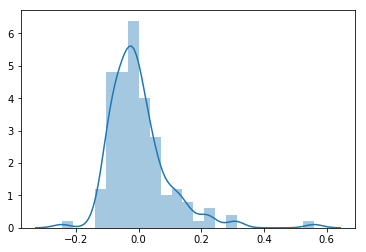

In [79]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

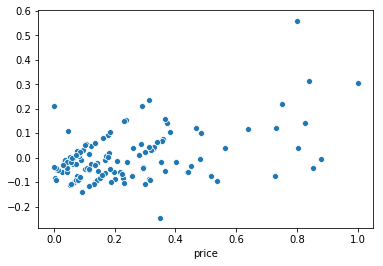

In [80]:
sns.scatterplot(y_train,y_train-y_train_predict)

In [81]:
X_test_rfe.head()

NameError: name 'X_test_rfe' is not defined

In [82]:
X_test.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
160  0          95.7       166.3      64.4      53.0       2094         
186  2          97.3       171.7      65.5      55.7       2275         
59   1          98.8       177.8      66.5      53.7       2385         
165  1          94.5       168.7      64.0      52.6       2265         
140  2          93.3       157.3      63.8      55.7       2240         

     cylindernumber  enginesize  boreratio  stroke  ...  Company_peugeot  \
160  4               98          3.19       3.03    ...  0                 
186  4               109         3.19       3.40    ...  0                 
59   4               122         3.39       3.39    ...  0                 
165  4               98          3.24       3.08    ...  0                 
140  4               108         3.62       2.64    ...  0                 

     Company_plymouth  Company_porsche  Company_renault  Company_saab  \
160  0                 0                0                0              
186  0                 0                0                0              
59   0                 0                0                0              
165  0                 0                0                0              
140  0                 0                0                0              

     Company_subaru  Company_toyota  Company_volkswagen  Company_volvo  \
160  0               1               0                   0               
186  0               0               1                   0               
59   0               0               0                   0               
165  0               1               0                   0               
140  1               0               0                   0               

     doornumber_4  
160  1             
186  1             
59   0             
165  0             
140  0             

[5 rows x 60 columns]

In [83]:
X_test_rfe=X_test.copy()

In [84]:
#Min Max Scaling of numerical columns in X_test

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])
# X_test_rfe[le_scaler_list]=X_test_rfe[le_scaler_list].apply(lambda x: le_scaler.fit_transform(x))

In [85]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [86]:
X_test_rfe=sm.add_constant(X_test_rfe)
y_test_predict=lr8.predict(X_test_rfe)

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test_rfe,y_test_predict)

0.6472409641427251

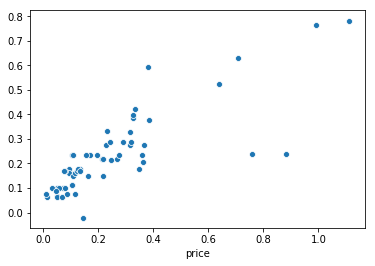

In [88]:
sns.scatterplot(y_test_rfe,y_test_predict)

In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_rfe,y_test_predict)

0.018854347807236195

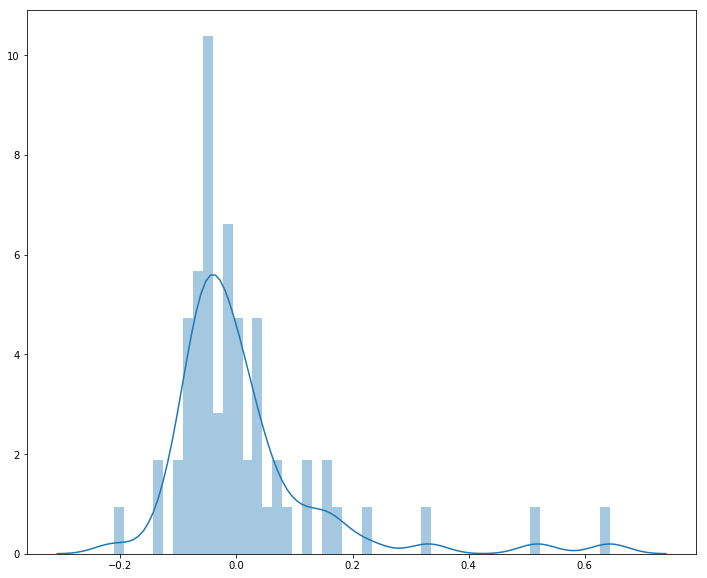

In [90]:
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict,bins=50)

Our Linear Regression equation becomes:
    

In [347]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 20 May 2020   Prob (F-statistic):           3.44e-66
Time:                        22:24:11   Log-Likelihood:                 194.75
No. Observations:                 143   AIC:                            -367.5
Df Residuals:                     132   BIC:                            -334.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.028      0.272      0.786      -0.048       0.064
wheelbase             0.1453      0.056      2.582      0.011       0.034       0.257
carwidth              0.2945      0.076      3.894      0.000       0.145       0.444
horsepower            0.4661      0.059      7.930      0.000       0.350       0.582
carbody_hatchback    -0.1370      0.027     -5.012      0.000      -0.191      -0.083
carbody_sedan        -0.1185      0.029     -4.135      0.000      -0.175      -0.062
carbody_wagon        -0.1343      0.032     -4.248      0.000      -0.197      -0.072
Company_bmw           0.2961      0.030      9.898      0.000       0.237       0.355
Company_buick         0.2575      0.035      7.412      0.000       0.189       0.326
Company_jaguar        0.2706      0.044      6.199      0.000       0.184       0.357
Company_porsche       0.1879      0.045      4.171      0.000       0.099       0.277
==============================================================================
Omnibus:                       30.744   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.289
Skew:                           0.845   Prob(JB):                     1.65e-17
Kurtosis:                       6.180   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   const              27.60
5   carbody_sedan      7.03 
2   carwidth           6.64 
4   carbody_hatchback  5.78 
1   wheelbase          4.56 
6   carbody_wagon      3.95 
3   horsepower         3.23 
10  Company_porsche    1.43 
8   Company_buick      1.40 
9   Company_jaguar     1.34 
7   Company_bmw        1.24

In [93]:

y_test_rfe['predicted_price']=scaler.inverse_transform(y_test_rfe['price'])

KeyError: 'price'